### Purpose: 
Script to plot some basic cone activation responses to spectra of single wavelength

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cone
import colorspace as cs

In [5]:
lmbda = np.linspace(350,720,100)
c = cone.cone('data/linss2_10e_fine.csv')
cL = list(map(c.cone_L,lmbda))
cM = list(map(c.cone_M,lmbda))
cS = list(map(c.cone_S,lmbda))

<IPython.core.display.Javascript object>


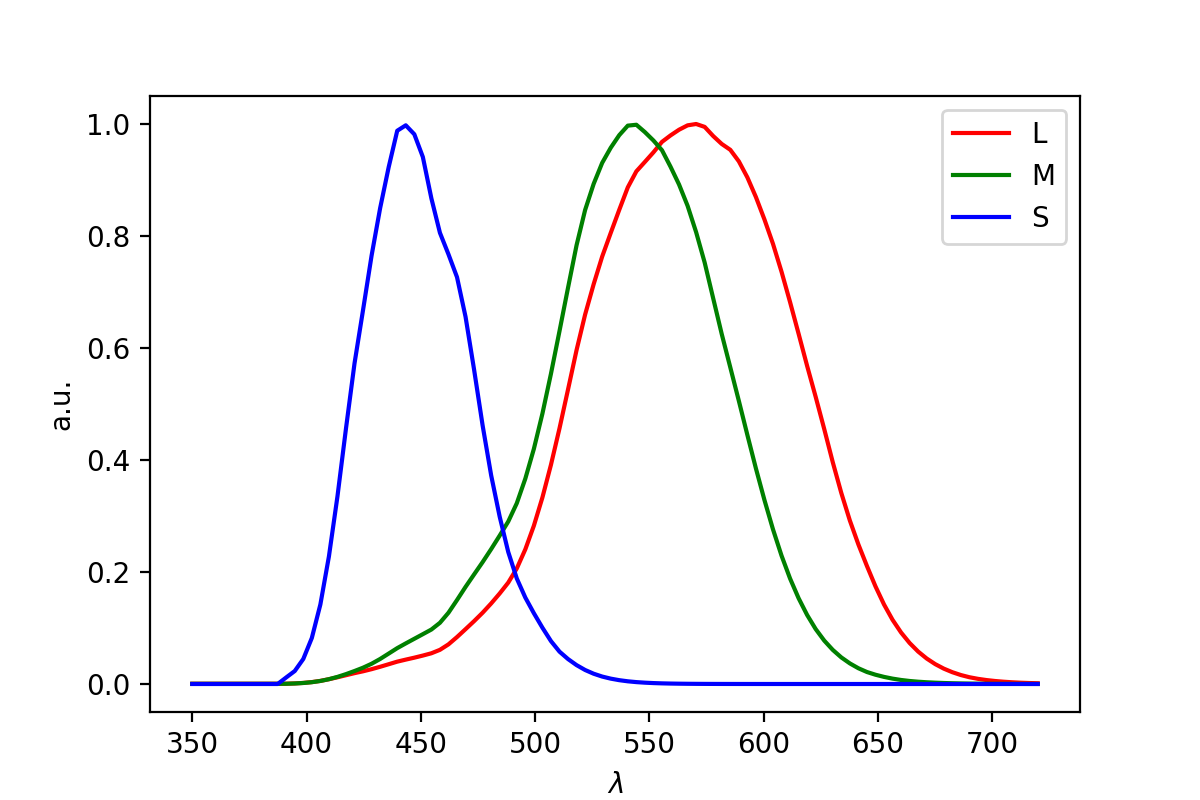

In [6]:
%matplotlib notebook
fig,ax = plt.subplots(1,1,figsize=(6,4), dpi=100)
ax.plot(lmbda,cL, 'red')
ax.plot(lmbda,cM, 'green')
ax.plot(lmbda,cS, 'blue')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('a.u.')
ax.legend(['L','M','S'])
plt.savefig('results/cone_activation.pdf')

<IPython.core.display.Javascript object>


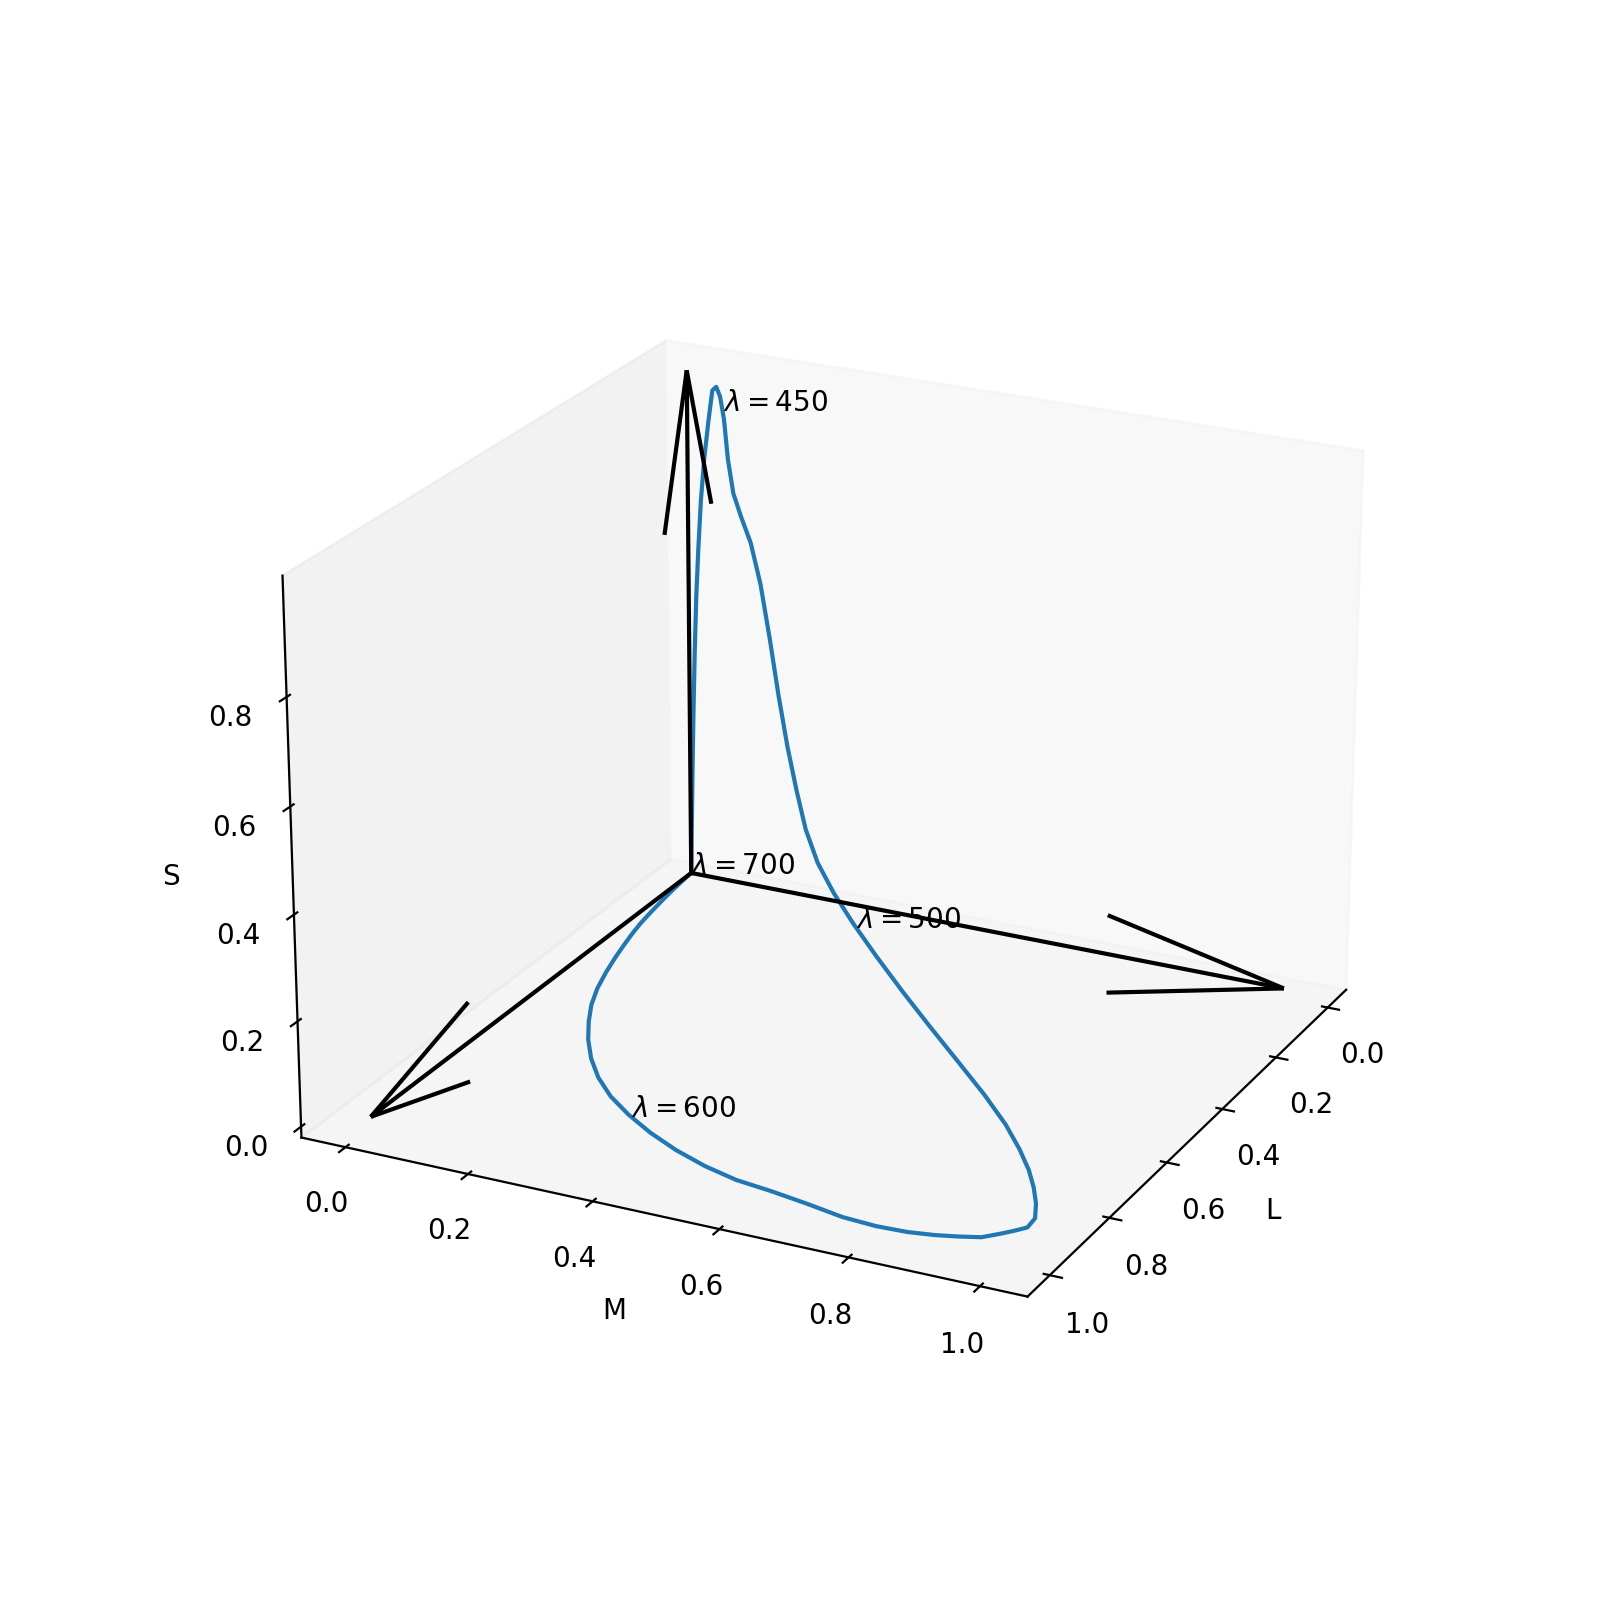

In [7]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

lblrange = np.asarray([450,500,600,700])
for lbl in lblrange:
    ax.text(c.cone_L(lbl),c.cone_M(lbl),c.cone_S(lbl),'$\lambda=%d$'%(lbl))
ax.plot(cL,cM,cS)
ax.quiver(0,0,0, 1,0,0, color="black",length=1)
ax.quiver(0,0,0, 0,1,0, color="black",length=1)
ax.quiver(0,0,0, 0,0,1, color="black",length=1)
ax.set_xlabel('L')
ax.set_ylabel('M')
ax.set_zlabel('S')
ax.grid(False)
ax.view_init(22.305194805197175, 26.266233766235814)
plt.show()
plt.savefig('results/cone_activation3d.pdf')

In [8]:
f = np.ones(lmbda.shape[0])
C = np.array([cL,cM,cS,f])

<IPython.core.display.Javascript object>


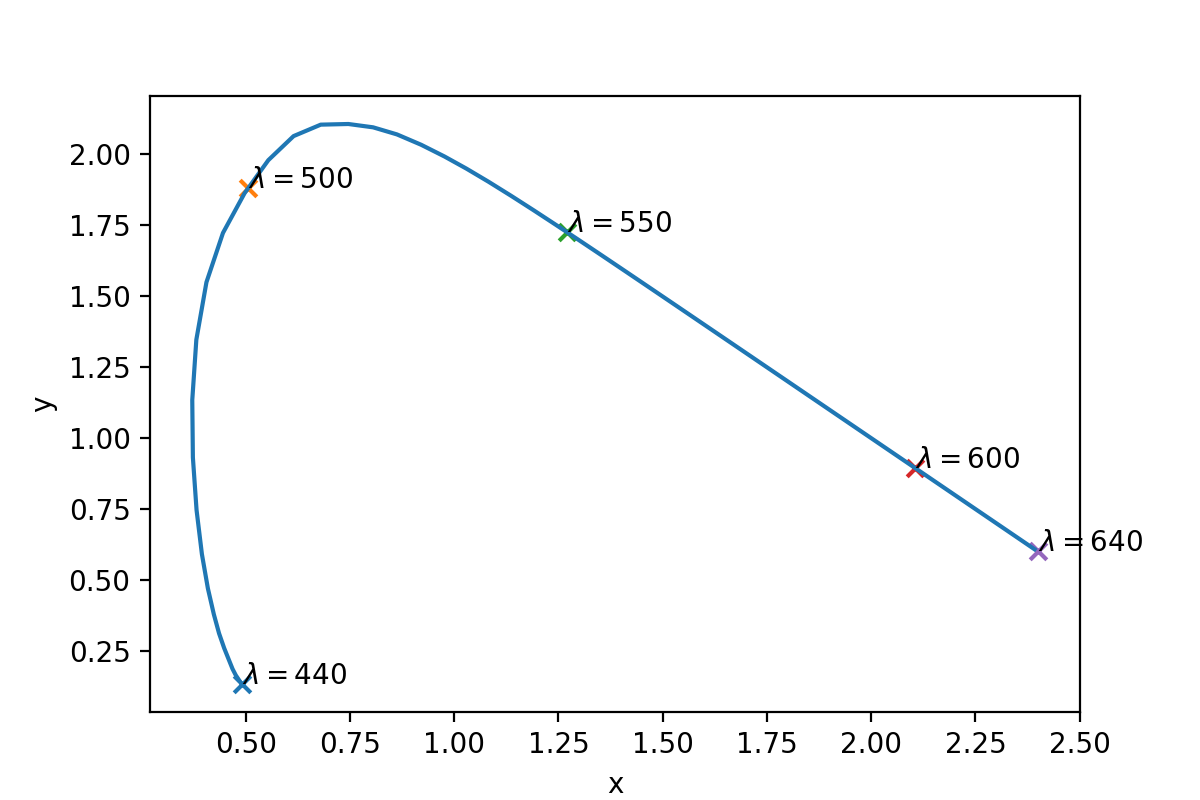

In [9]:
fig,ax = plt.subplots(1,1,figsize=(6,4), dpi=100)
xyz = cs.LMStoxyz(np.array([cL,cM,cS]))
xyz_idx = (lmbda>440) * (lmbda < 640)
ax.plot(xyz[0,xyz_idx],xyz[1,xyz_idx])
ax.set_xlabel('x')
ax.set_ylabel('y')
lblrange = np.asarray([440,500, 550,600,640])
for lbl in lblrange:
    lblxyz = cs.LMStoxyz(np.array([c.cone_L(lbl),c.cone_M(lbl),c.cone_S(lbl)]))
    ax.text(lblxyz[0],lblxyz[1],'$\lambda=%d$'%(lbl))
    ax.scatter(lblxyz[0],lblxyz[1],marker='x')

In [10]:
from scipy.linalg import solve, null_space

In [11]:
x = np.array([cL,cM,cS])

cs.LMStoXYZ(x[:,-1])

array([0.00244098, 0.00054515, 0.        ])

<IPython.core.display.Javascript object>


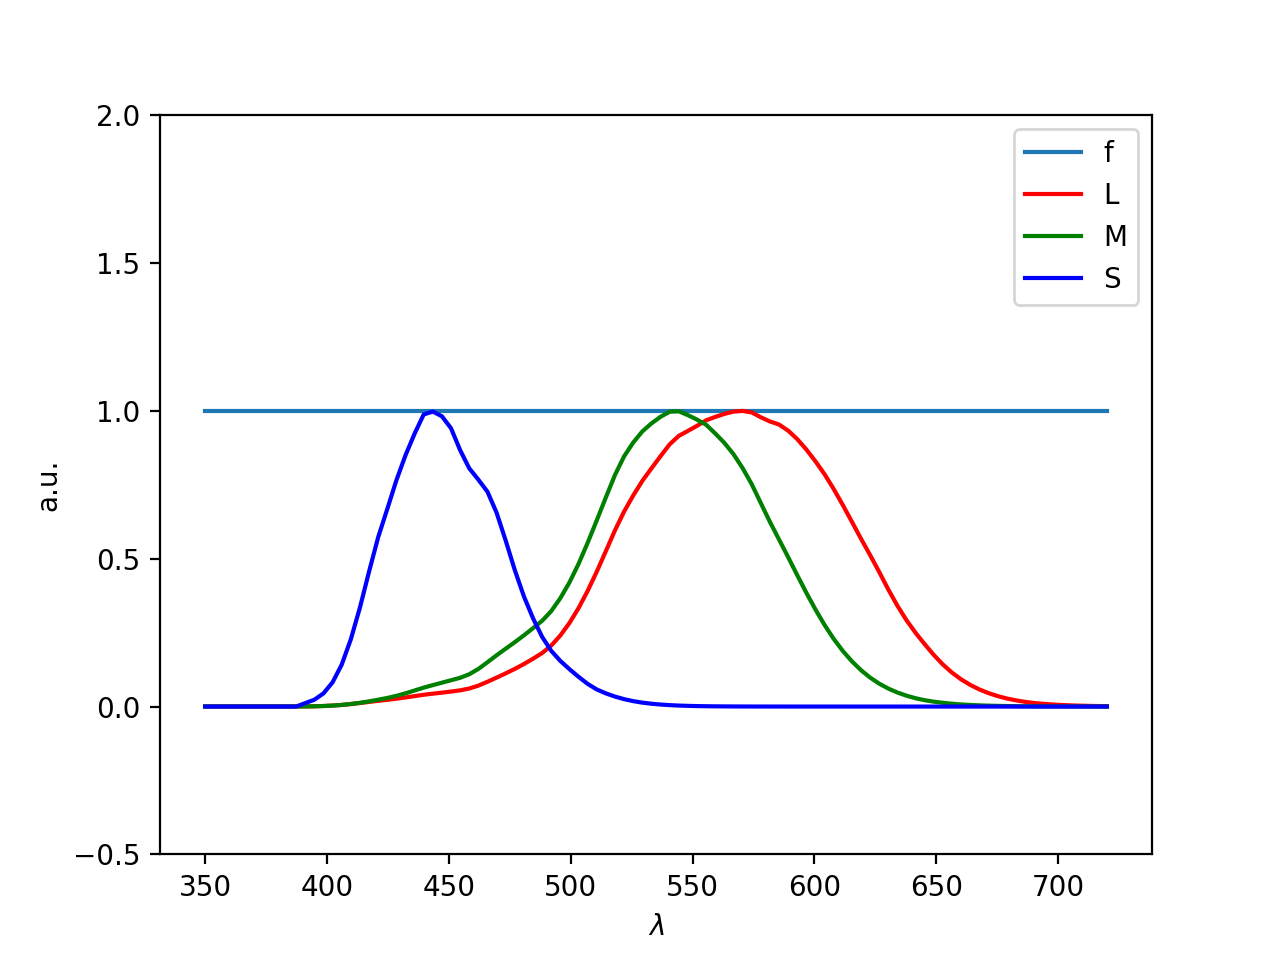

In [12]:
fig,ax = plt.subplots()
plt.plot(lmbda,f)

ax.plot(lmbda,cL, 'red')
ax.plot(lmbda,cM, 'green')
ax.plot(lmbda,cS, 'blue')

ax.set_xlabel('$\lambda$')
ax.set_ylabel('a.u.')
ax.legend(['f', 'L','M','S'])
ax.set_ylim([-0.5,2])
plt.show()

In [13]:
C0 = C @ f

In [14]:
C0

array([ 31.03256967,  25.37504033,  15.6334069 , 100.        ])

In [15]:
NC = null_space(C)

In [16]:
NC.shape

(100, 96)

In [17]:
NC[:,80:81].shape

(100, 1)

<IPython.core.display.Javascript object>


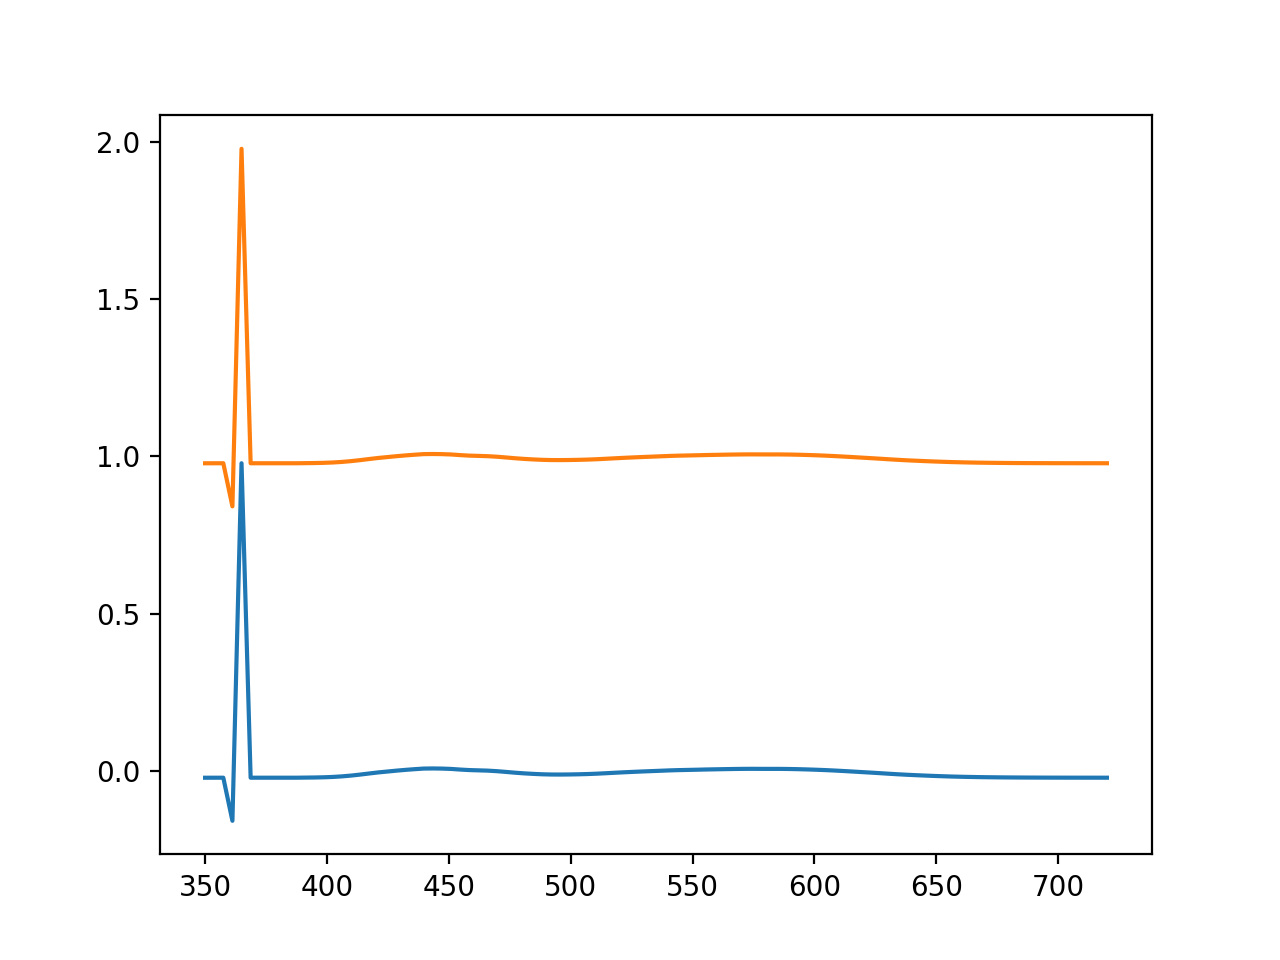

In [18]:
fig,ax = plt.subplots()
for nc in NC[:,0:1].T:
    plt.plot(lmbda, nc)
    
plt.show()

In [19]:
C @ nc

array([-4.33138768e-17, -3.08455518e-17,  2.89481980e-17, -2.22044605e-16])

In [20]:
plt.plot(lmbda, f + nc)
plt.show()

In [21]:
rand_pert = 5*(2*np.random.rand(NC.shape[1]) - 1)
ramp_pert = 5*(2*np.linspace(0,1,NC.shape[1]) - 1)

In [22]:
(f + nc).T @ (f + nc)

100.99999999999999

In [23]:
# pert = np.sum(NC @ np.diag(rand_pert),axis = 1)
pert = np.sum(NC @ np.diag(ramp_pert),axis = 1)

In [24]:
# f + pert > 0 for all lambda
# pert = a1*f1 + a2*f2 +...


<IPython.core.display.Javascript object>


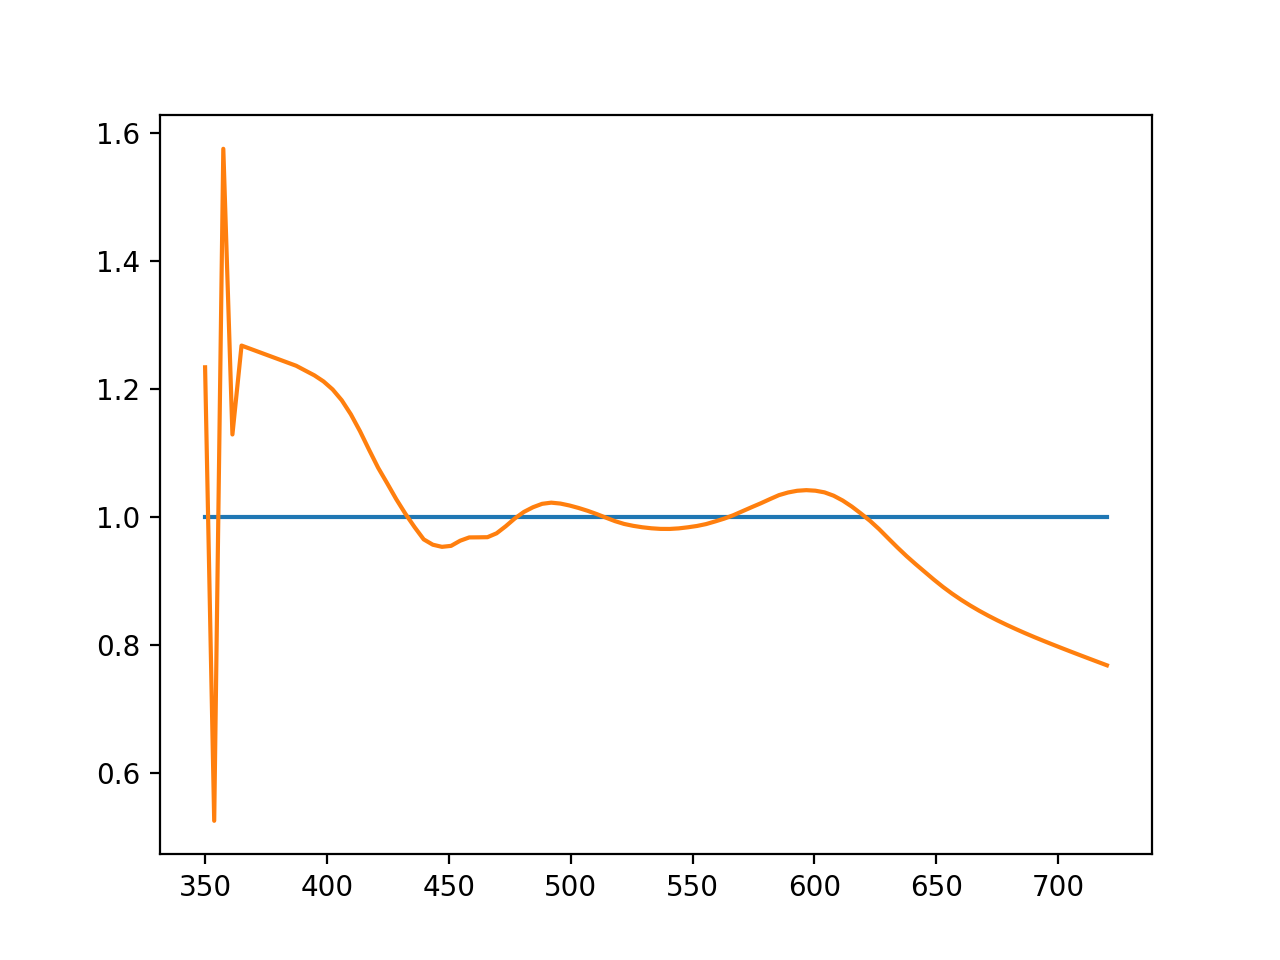

In [25]:
plt.figure()
# plt.plot(lmbda, pert)
plt.plot(lmbda, f)
plt.plot(lmbda, f - 0.05*pert)
plt.show()

In [26]:
C @ (f + pert)

array([ 31.03256967,  25.37504033,  15.6334069 , 100.        ])

In [27]:
C @ f

array([ 31.03256967,  25.37504033,  15.6334069 , 100.        ])

<IPython.core.display.Javascript object>


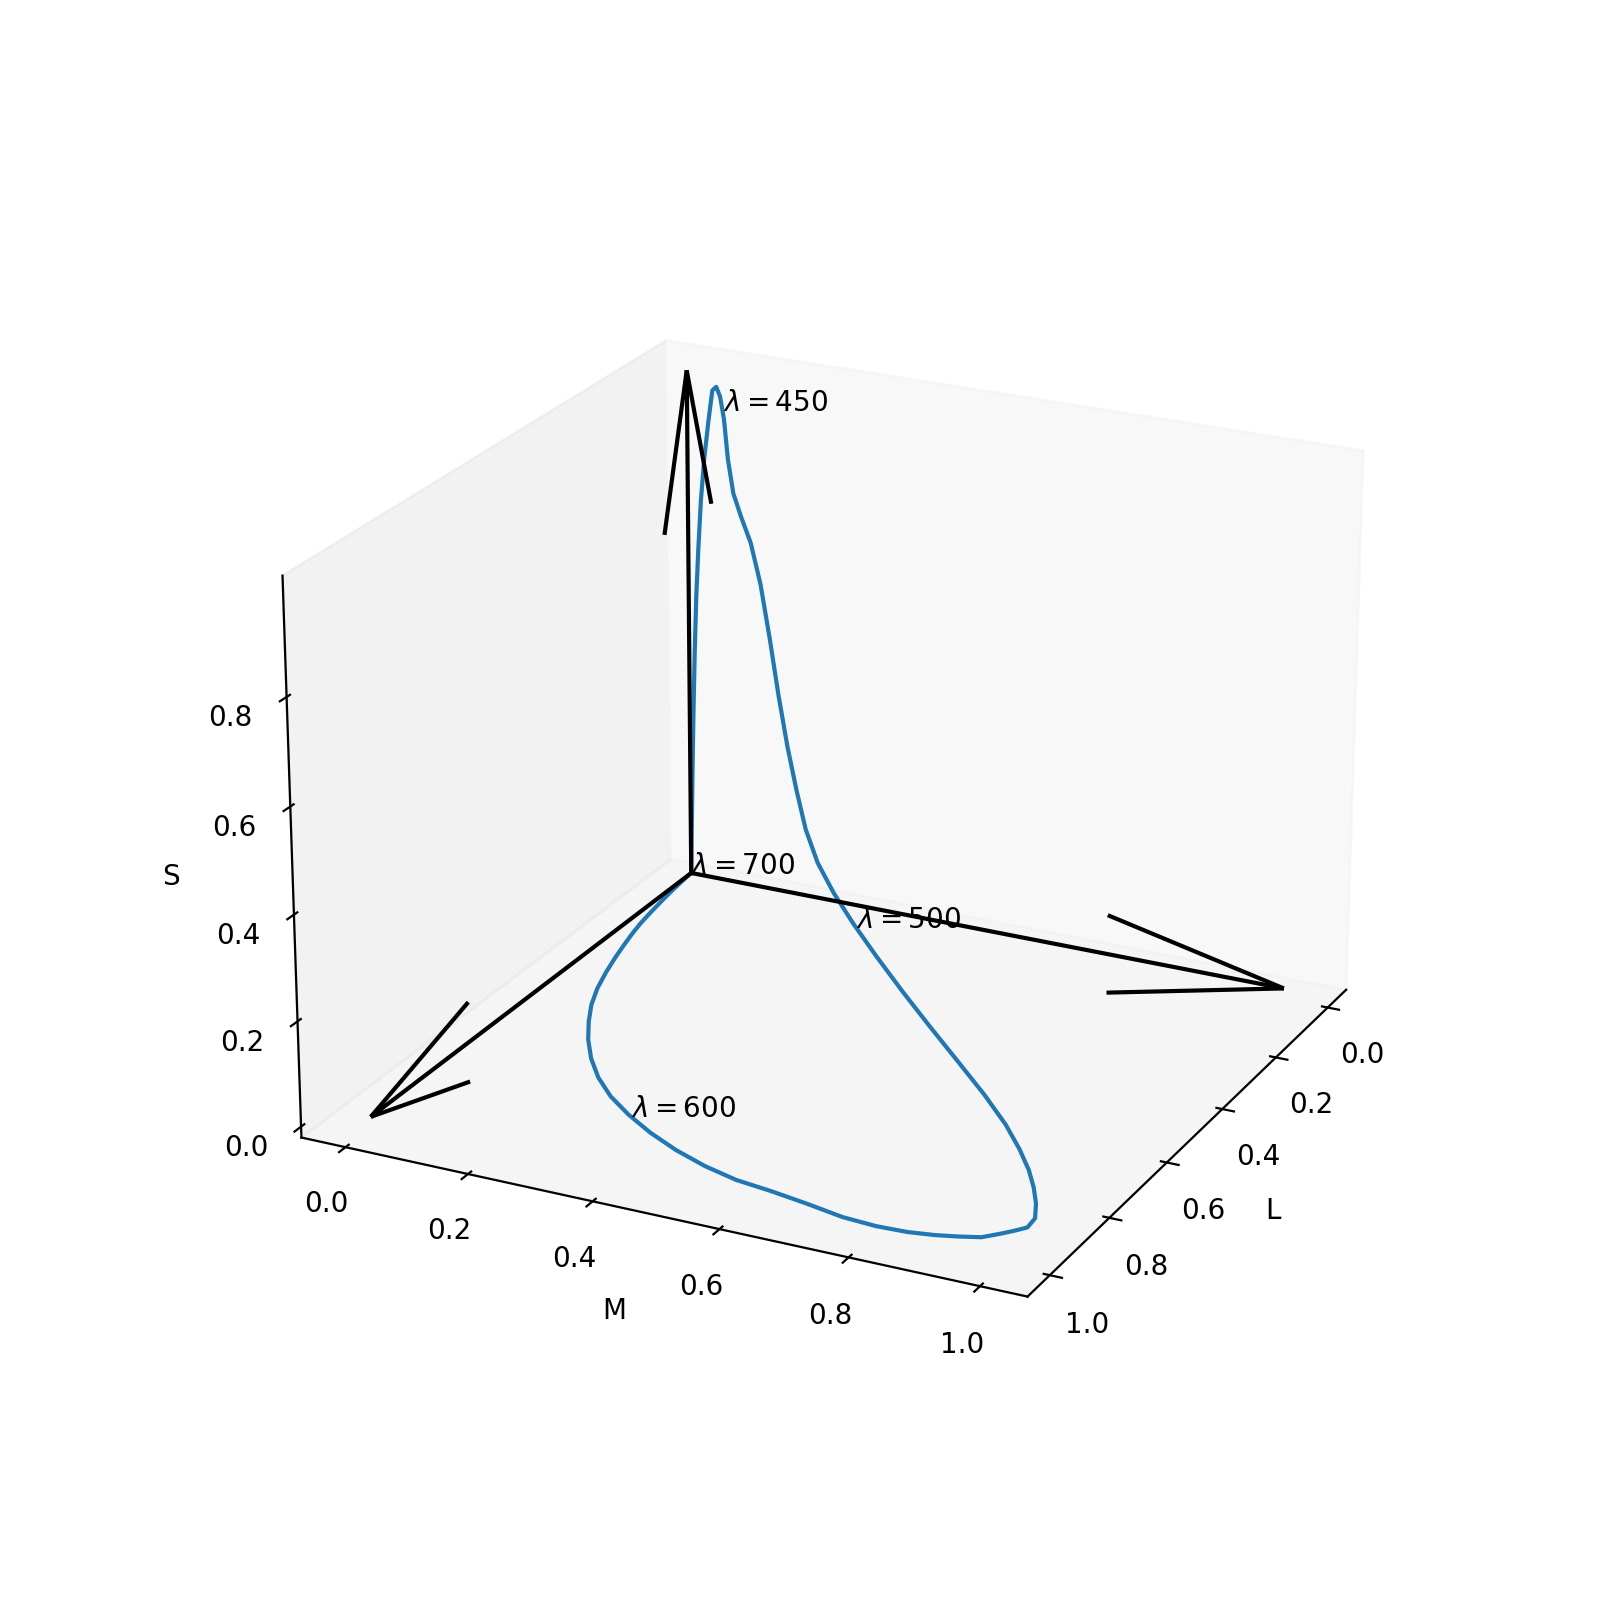

In [28]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

lblrange = np.asarray([450,500,600,700])
for lbl in lblrange:
    ax.text(c.cone_L(lbl),c.cone_M(lbl),c.cone_S(lbl),'$\lambda=%d$'%(lbl))
ax.plot(cL,cM,cS)
ax.quiver(0,0,0, 1,0,0, color="black",length=1)
ax.quiver(0,0,0, 0,1,0, color="black",length=1)
ax.quiver(0,0,0, 0,0,1, color="black",length=1)
ax.set_xlabel('L')
ax.set_ylabel('M')
ax.set_zlabel('S')
ax.grid(False)
ax.view_init(22.305194805197175, 26.266233766235814)
plt.show()
plt.savefig('results/cone_activation3d.pdf')

In [29]:
# Check column space instead...

In [30]:
q,r = np.linalg.qr(C)


In [31]:
q

array([[-4.15002936e-04, -3.68348943e-04, -9.54728853e-11,
        -9.99999846e-01],
       [-3.68348943e-04,  9.99999864e-01, -3.51527479e-14,
        -3.68196084e-04],
       [-9.54728853e-11, -3.51527479e-14,  1.00000000e+00,
        -9.54332655e-11],
       [-9.99999846e-01, -3.68196084e-04, -9.54332655e-11,
         4.15138561e-04]])

In [32]:
r

array([[-1.00000015e+00, -1.00000015e+00, -1.00000015e+00,
        -1.00000015e+00, -1.00000015e+00, -1.00000015e+00,
        -1.00000015e+00, -1.00000015e+00, -1.00000015e+00,
        -1.00000015e+00, -1.00000015e+00, -1.00000023e+00,
        -1.00000061e+00, -1.00000131e+00, -1.00000244e+00,
        -1.00000414e+00, -1.00000656e+00, -1.00000949e+00,
        -1.00001286e+00, -1.00001644e+00, -1.00002000e+00,
        -1.00002417e+00, -1.00002907e+00, -1.00003452e+00,
        -1.00004000e+00, -1.00004462e+00, -1.00004910e+00,
        -1.00005369e+00, -1.00005845e+00, -1.00006543e+00,
        -1.00007609e+00, -1.00008987e+00, -1.00010437e+00,
        -1.00011850e+00, -1.00013288e+00, -1.00014827e+00,
        -1.00016461e+00, -1.00018185e+00, -1.00020437e+00,
        -1.00023474e+00, -1.00027179e+00, -1.00031588e+00,
        -1.00036633e+00, -1.00042136e+00, -1.00047877e+00,
        -1.00053595e+00, -1.00058538e+00, -1.00062507e+00,
        -1.00065941e+00, -1.00068684e+00, -1.00071231e+0

<IPython.core.display.Javascript object>


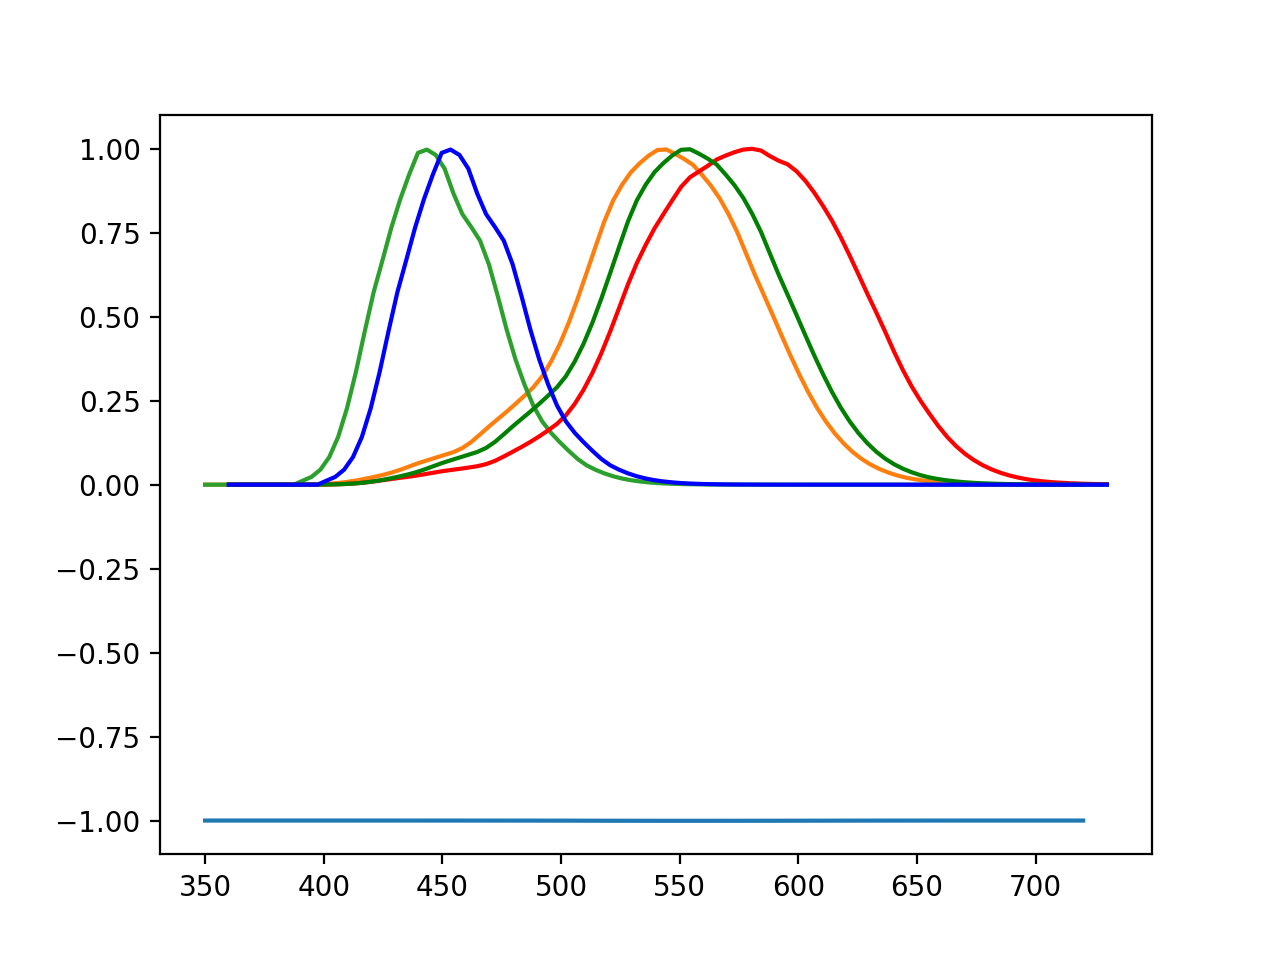

In [33]:
plt.figure()

plt.plot(lmbda,r[0,:])
plt.plot(lmbda,r[1,:])
plt.plot(lmbda,r[2,:])

plt.plot(lmbda +10,cL, 'red')
plt.plot(lmbda+10,cM, 'green')
plt.plot(lmbda+10,cS, 'blue')

plt.show()

In [36]:
import geomstats as gs

INFO: Using numpy backend


In [37]:
sphere = gs.geometry.hypersphere.Hypersphere(2-1)

In [38]:
f = sphere.random_uniform(100)

In [39]:
f.shape

(100, 2)

In [40]:
fp = sphere.extrinsic_to_intrinsic_coords(f)
ff = sphere.intrinsic_to_extrinsic_coords(fp)

<IPython.core.display.Javascript object>


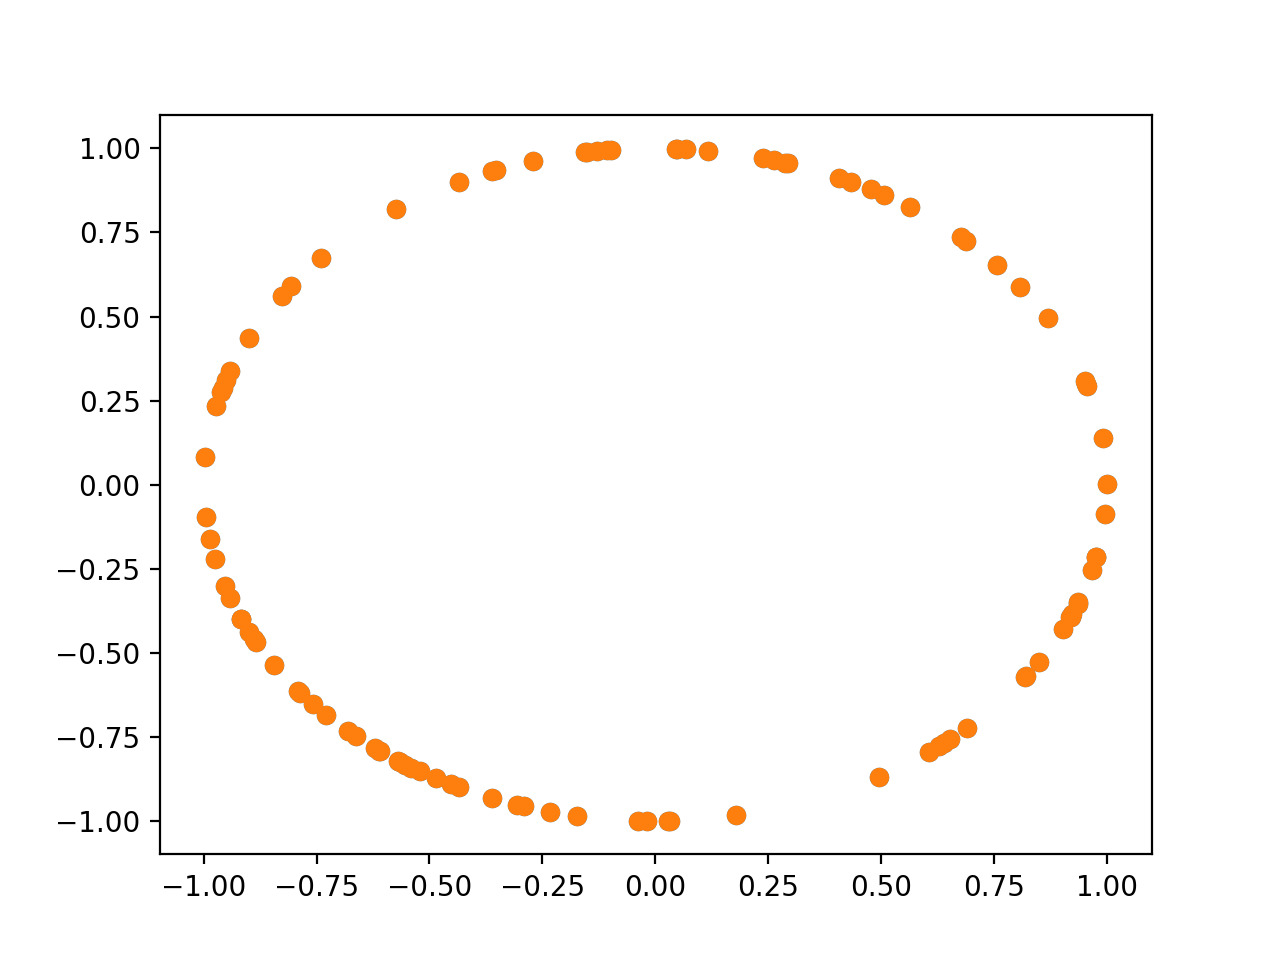

In [41]:
plt.figure()
plt.scatter(f[:,0],f[:,1])
plt.scatter(f[:,0],f[:,1])
plt.show()